In [11]:
#libraries
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot
import os
import h5py

In [12]:
train_dataGen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.1,
    horizontal_flip = False,
    fill_mode = 'nearest')

train_generator = train_dataGen.flow_from_directory(
    directory=r"D:\mosaic\DevanagariHandwrittenCharacterDataset\Train",
    target_size=(32,32),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"D:\mosaic\DevanagariHandwrittenCharacterDataset\Test",
    target_size=(32,32),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 44200 images belonging to 26 classes.
Found 7800 images belonging to 26 classes.


In [13]:
#LeNET-5 model
model=Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=26, activation = 'softmax'))

#model.summary()

Epoch 1/25
1700/1700 [==============================] - 36s 21ms/step - loss: 1.2469 - acc: 0.6262 - val_loss: 0.3457 - val_acc: 0.8910
Epoch 2/25
1700/1700 [==============================] - 36s 21ms/step - loss: 0.4444 - acc: 0.8638 - val_loss: 0.1804 - val_acc: 0.9472
Epoch 3/25
1700/1700 [==============================] - 39s 23ms/step - loss: 0.3086 - acc: 0.9062 - val_loss: 0.1359 - val_acc: 0.9598
Epoch 4/25
1700/1700 [==============================] - 41s 24ms/step - loss: 0.2504 - acc: 0.9248 - val_loss: 0.0991 - val_acc: 0.9696
Epoch 5/25
1700/1700 [==============================] - 41s 24ms/step - loss: 0.2110 - acc: 0.9348 - val_loss: 0.1143 - val_acc: 0.9682
Epoch 6/25
1700/1700 [==============================] - 41s 24ms/step - loss: 0.1847 - acc: 0.9440 - val_loss: 0.1043 - val_acc: 0.9708 - ETA: 1s
Epoch 7/25
1700/1700 [==============================] - 43s 25ms/step - loss: 0.1555 - acc: 0.9518 - val_loss: 0.0780 - val_acc: 0.9774
Epoch 8/25
1700/1700 [================

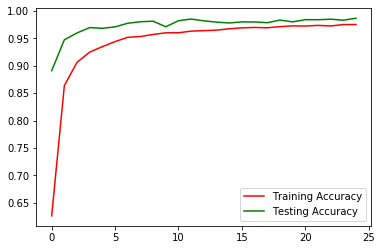

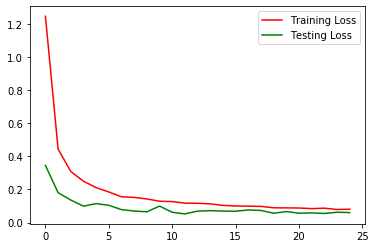

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0),
        loss = "categorical_crossentropy",
        metrics = ["accuracy"])

res=model.fit_generator(
        train_generator,
        epochs = 25,
        steps_per_epoch = 1700,
        validation_data = test_generator,
        validation_steps = 300
        )
%matplotlib inline
accu=res.history['acc']
val_acc=res.history['val_acc']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

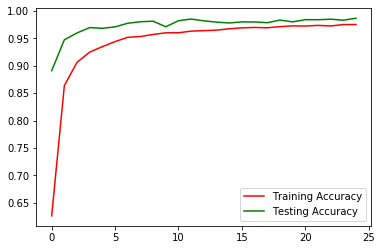

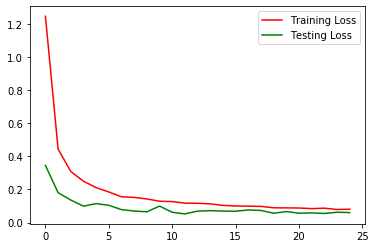

In [15]:
%matplotlib inline
accu=res.history['acc']
val_acc=res.history['val_acc']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [18]:
model.save('D:\mosaic\model.h5py')

In [19]:
model.save_weights('D:\mosaic\weight.h5')

<Figure size 432x288 with 0 Axes>